# Pancakes with a problem!           
### Magnert Stevan Valbuena Gaviria
---



In [ ]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [ ]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

PROFUNDIDAD

In [ ]:
def deep(dic, init, res, maxx):
  maxx.append(res)
  raiz = dic[init]
  for i in range(len(raiz)):
    deep(dic, raiz[i], res + 1, maxx)
  return max(maxx)

### 1. Modify the PancakesTrees.ipynb code in your own to plot the Pancake Network and calculate Pn for smal n‘s.

In [ ]:
def network_BFS(n): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict(int)
        G = pydot.Dot(graph_type="digraph")
        init=[]
        for i in range(n):
          init.append(i+1)
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(init) 
        visited[lstr(init)] = 1
        while queue: 
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2::]
              if (d != s) and (visited[lstr(d)]==0):                
                node = pydot.Node(lstr(d))
                G.add_node(node)
                edge = pydot.Edge(lstr(s),lstr(d))
                graph[lstr(s)].append(lstr(d))
                G.add_edge(edge)
                queue.append(d)
                visited[lstr(d)]= 1
        temp = []
        temp.append(1)
        maximo = deep(graph,lstr(init),1,temp)
        print("Pn =",maximo-1)
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

Pn = 3


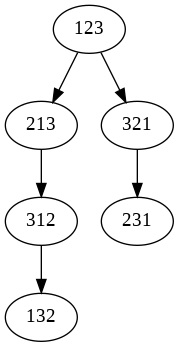

In [ ]:
p=3    #Número de Pancakes
network_BFS(p)

### 2. Modify the PancakesTrees.ipynb code leaving only the necessary code and data structures required to calculate the Pn and run the code for at least one night (8 hours) starting with n=5. What is the largest Pn calculated? 

In [ ]:
def panckakes_overnight(n): 

        graph = defaultdict()
        visited = defaultdict(int)
        init=[]
        for i in range(n):
          init.append(i+1)
        queue = [] 

        queue.append(init) 
        visited[lstr(init)] = 1
        while queue: 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2::]
              if (d != s) and (visited[lstr(d)]==0):                
                graph[lstr(s)].append(lstr(d))
                queue.append(d)
                visited[lstr(d)]= 1
        temp = []
        temp.append(1)
        maximo = deep(graph,lstr(init),1,temp)
        print("worst case: "+ str(maximo-1))

In [ ]:
n=5
while(True):
  print("n= "+ str(n))
  panckakes_overnight(n)
  n = n+1

n= 5
worst case: 5
n= 6
worst case: 7
n= 7
worst case: 8
n= 8
worst case: 9
n= 9
worst case: 10
n= 10


KeyboardInterrupt: ignored

### Screenshot despues de las 8 horas de prueba

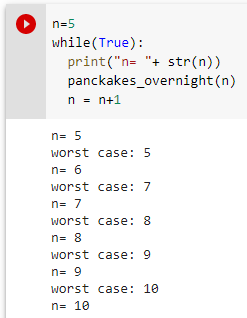

### 3. Modify the PancakesTrees.ipynb code to plot the pancakes trees using two spatulas.

In [ ]:
def two_spatulas_BFS(s): 

        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        queue = [] 
   
        queue.append(s)
        visited[lstr(s)] = True
  
        while queue:
            s = queue.pop(0) 
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            if(s != sorted(s)):
              for i in range(len(s)):
                for j in range(i+1,len(s)):
                  d = s[i::-1] + s[j:i:-1] + s[j+1:] 
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if(d != sorted(d)):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    queue.append(d) 
                    visited[lstr(d)] = True
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

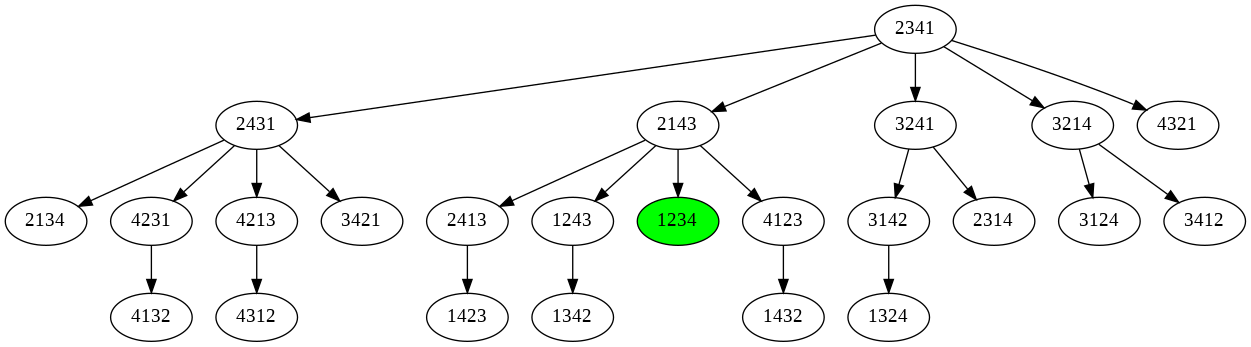

In [ ]:
p = [2,3,4,1]   #Orden de los pancakes, en este caso, 4 pancakes
two_spatulas_BFS(p)